In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Importing dataset

In [5]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\datasets\Salary_Data.xlsx")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Analyzing dataset

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    str    
 2   Education Level      373 non-null    str    
 3   Job Title            373 non-null    str    
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), str(3)
memory usage: 17.7 KB


Minimum Age =23 Maximum Age=53 Minimum years of Experience=0 Maximum years of Experience=25 Minimum Salary=350 Maximum Salary=250000

In [5]:
df["Job Title"].value_counts()

Job Title
Director of Marketing            12
Director of Operations           11
Senior Business Analyst          10
Senior Marketing Manager          9
Senior Marketing Analyst          9
                                 ..
Junior Research Scientist         1
Senior HR Specialist              1
Junior Operations Coordinator     1
Director of HR                    1
Junior Financial Advisor          1
Name: count, Length: 174, dtype: int64

In [6]:
df["Education Level"].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [7]:
df["Gender"].value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

<Axes: xlabel='Years of Experience', ylabel='Salary'>

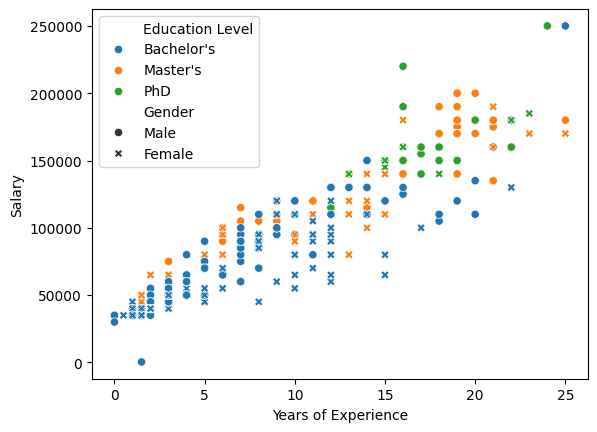

In [8]:
sns.scatterplot(
    x="Years of Experience",
    y="Salary",
    data=df,
    hue=df['Education Level'],
    style=df['Gender']
)

<Axes: xlabel='Education Level', ylabel='Salary'>

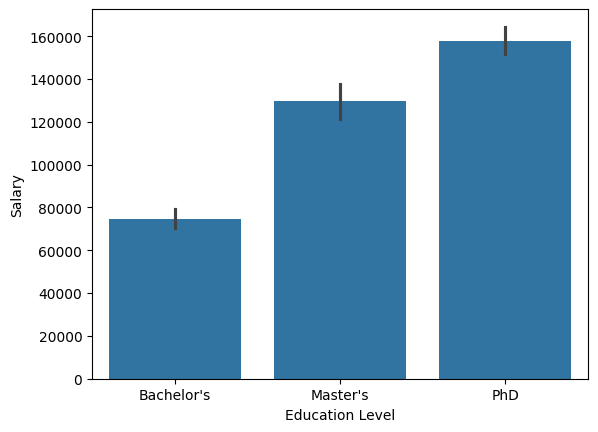

In [9]:
sns.barplot(x="Education Level",y="Salary",data=df)

In [10]:
columns_to_drop=["Age","Gender"]
df.drop(columns_to_drop,axis=1,inplace=True)
df.head()

,Education Level,Job Title,Years of Experience,Salary
0,Bachelor's,Software Engineer,5.0,90000.0
1,Master's,Data Analyst,3.0,65000.0
2,PhD,Senior Manager,15.0,150000.0
3,Bachelor's,Sales Associate,7.0,60000.0
4,Master's,Director,20.0,200000.0


Train-Test spilt

In [14]:
df = df.dropna(subset=["Education Level"])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Salary',axis=1),df['Salary'],test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((298, 3), (75, 3), (298,), (75,))

Column Transformer/Standardization/Encoding

In [16]:
edu_order=[["Bachelor's","Master's","PhD"]]
num_cols=["Years of Experience"]

In [17]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),num_cols),
        ("edu",OrdinalEncoder(categories=edu_order),["Education Level"]),
        ("job",OneHotEncoder(
            drop='first',
            sparse_output=False,
            handle_unknown="ignore"
            ),["Job Title"])
    ]
)

In [18]:
x_train_final=preprocessor.fit_transform(x_train)
x_test_final=preprocessor.transform(x_test)

d:\ML_Practice\mlmodule\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


In [19]:
np.std(x_test_final)

np.float64(0.13236945802342115)

In [20]:
np.mean(x_train_final[:, :3], axis=0)

array([-1.41572064e-17,  5.20134228e-01,  6.71140940e-03])

In [21]:
np.std(x_train_final[:, :3], axis=0)

array([1.        , 0.71508012, 0.08164782])